Extreme Machine Learning
====

[Extreme Learning Machine - Denso IT Laboratory researcher's blog sites](https://tech.d-itlab.co.jp/ml/229/)

[JuliaでExtreme Learning Machineを書く - Qiita](https://qiita.com/takilog/items/866e3e1b689ef024d356)

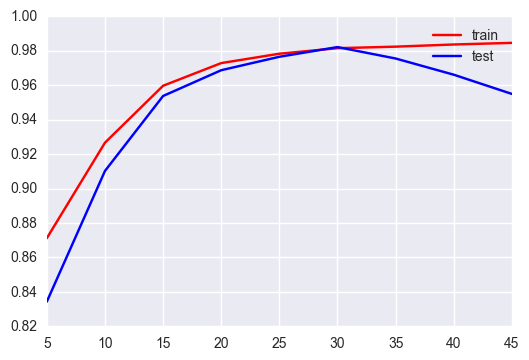

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from sklearn import datasets
from ExtremeLearningMachine import EnsembleELM

iris = datasets.load_iris()
ind = np.random.permutation(len(iris.data))

y = np.zeros((len(iris.target), 3))
y[np.arange(len(y)), iris.target] = 1

acc_train = []
acc_test = []
N = range(5,50,5)

# The number of iris data used as train. Note that the number of iris data is 150.
train_num = 100

# The number of ensemble ELMs
ensemble = 500
for n in N:
    ensembleELM = EnsembleELM(ensemble, n)
    _acc_train = []
    _acc_test = []
    for elm in ensembleELM.elm:
        elm.fit(iris.data[ind[:train_num]], y[ind[:train_num]])
        _acc_train.append(np.average(np.argmax(elm.transform(iris.data[ind[:train_num]]), axis=1) == iris.target[ind[:train_num]]))
        _acc_test.append(np.average(np.argmax(elm.transform(iris.data[ind[train_num:]]), axis=1) == iris.target[ind[train_num:]]))
    acc_train.append(np.mean(_acc_train))
    acc_test.append(np.mean(_acc_test))
plt.plot(N, acc_train, c='red', label='train')
plt.plot(N, acc_test, c='blue', label='test')
plt.legend(loc=1);

N should be sufficient around 30. In case of more than that, the model will be overfit.